In [1]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split

In [66]:
# tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

import keras
from keras.models import Sequential, Model  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import F1Score, AUC, CategoricalAccuracy, BinaryAccuracy

print( f'tf.__version__: {tf.__version__}' )
print( f'keras.__version__: {keras.__version__}' )


tf.__version__: 2.15.0
keras.__version__: 2.15.0


In [3]:
import cv2
from PIL import Image

In [4]:
data_dir = 'training_data/training_data'
file_list = os.listdir(data_dir)

In [5]:
df = pd.read_csv('training_data/training_norm.csv')
df.head(5)

,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


In [6]:
image_id = []
image_name = []
image_path = []
image_array = []
file_size = []

for filename in file_list:
    im = cv2.imread(data_dir + '/' + filename)

    image_id.append(int(filename.split('.')[0]))
    # image_name.append(filename)
    image_array.append(im)
    image_path.append(data_dir + '/' + filename)
    file_size.append(os.path.getsize(data_dir + '/' + filename))


In [7]:
data = {
    'image_id': image_id,
    'image': image_array,
    'image_path': image_path,
    'file_size': file_size
}
df_image = pd.DataFrame(data)
df_image.head(5)

,image_id,image,image_path,file_size
0,3975,"[[[150, 129, 118], [135, 113, 103], [158, 108,...",training_data/training_data/3975.png,128771
1,8820,"[[[208, 209, 207], [208, 209, 207], [212, 211,...",training_data/training_data/8820.png,117739
2,9280,"[[[242, 224, 223], [243, 225, 224], [239, 226,...",training_data/training_data/9280.png,119558
3,348,"[[[17, 15, 6], [24, 22, 13], [59, 51, 48], [22...",training_data/training_data/348.png,112400
4,12085,"[[[204, 188, 188], [204, 188, 188], [208, 190,...",training_data/training_data/12085.png,121987


In [8]:
def get_image_shape(image_list):
    # Convert the list to a NumPy array and get its shape
    return np.array(image_list).shape

# Apply the function to the 'image' column to create a new 'image_shape' column
df_image['image_shape'] = df_image['image'].apply(get_image_shape)

In [9]:
merged_df = pd.merge(df, df_image, how='left', on='image_id')
print(f"Length:{len(merged_df)}")
merged_df.head()

Length:13793


,image_id,angle,speed,image,image_path,file_size,image_shape
0,1,0.4375,0.0,"[[[134, 135, 139], [134, 135, 139], [136, 139,...",training_data/training_data/1.png,128113,"(240, 320, 3)"
1,2,0.8125,1.0,"[[[160, 144, 142], [155, 140, 138], [156, 136,...",training_data/training_data/2.png,127064,"(240, 320, 3)"
2,3,0.4375,1.0,"[[[65, 40, 60], [66, 41, 61], [63, 53, 55], [6...",training_data/training_data/3.png,126239,"(240, 320, 3)"
3,4,0.6250,1.0,"[[[16, 12, 8], [5, 2, 0], [80, 64, 65], [135, ...",training_data/training_data/4.png,113880,"(240, 320, 3)"
4,5,0.5000,0.0,"[[[189, 163, 165], [190, 164, 166], [203, 170,...",training_data/training_data/5.png,125944,"(240, 320, 3)"


In [112]:
describe_df = merged_df.copy()
describe_df['angle'] = describe_df['angle']*16
describe_df['speed'] = describe_df['speed']*35

In [113]:
describe_df.groupby('angle').count()

,image_id,speed,image,image_path,file_size,image_shape
angle,,,,,,
0.0,60,60,60,60,60,60
1.0,28,28,28,28,28,28
2.0,99,99,99,99,99,99
3.0,98,98,98,98,98,98
4.0,104,104,104,104,104,104
5.0,213,213,213,213,213,213
6.0,428,428,428,428,428,428
7.0,1467,1467,1467,1467,1467,1467
8.0,2046,2046,2046,2046,2046,2046


In [69]:
describe_df.groupby('speed').count()

,image_id,angle,image,image_path,file_size
speed,,,,,
0.0,3390,3390,3390,3390,3390
35.0,10402,10402,10402,10402,10402
50.0,1,1,1,1,1


### EDA

image_path: training_data/training_data/22.png
steering_Angle: 0.312500
speed: 0


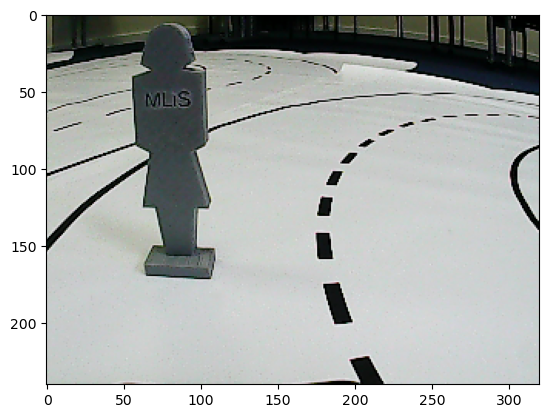

In [10]:
image_index = 21
plt.imshow(Image.open(merged_df['image_path'][image_index]))
print("image_path: %s" % merged_df['image_path'][image_index])
print("steering_Angle: %f" % merged_df['angle'][image_index])
print("speed: %d" % merged_df['speed'][image_index])

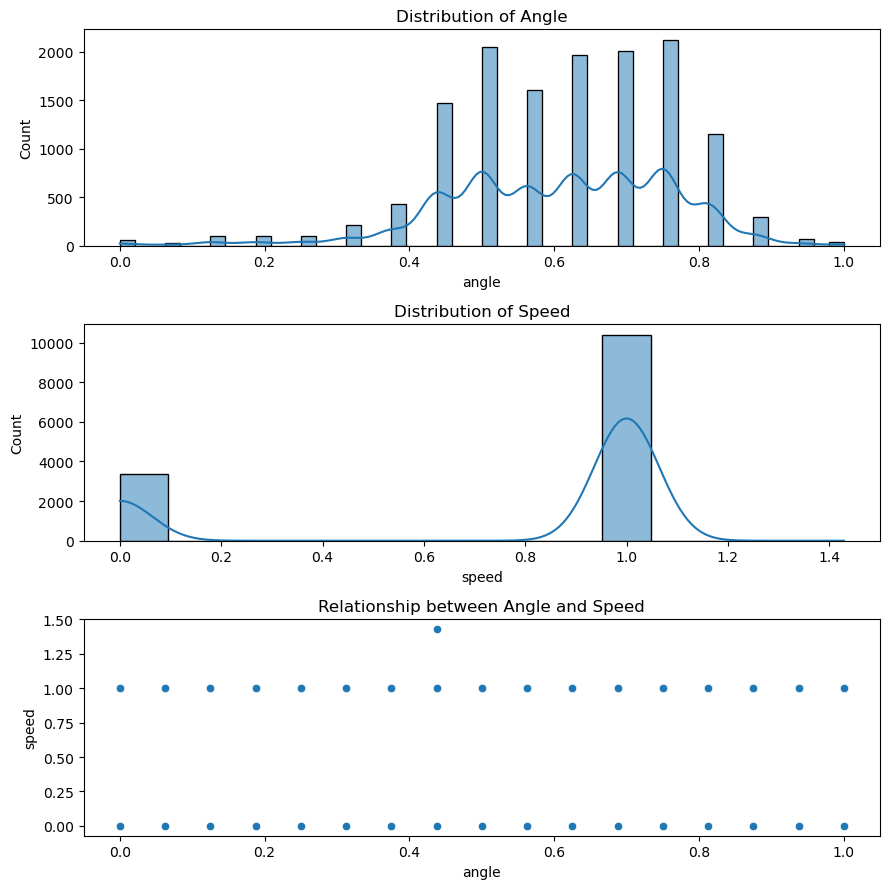

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(9, 9))

# First subplot: Distribution of the 'angle' variable
plt.subplot(3, 1, 1)  # (1 row, 3 cols, 1st plot)
sns.histplot(df['angle'], kde=True)
plt.title('Distribution of Angle')

# Second subplot: Distribution of the 'speed' variable
plt.subplot(3, 1, 2)  # (1 row, 3 cols, 2nd plot)
sns.histplot(df['speed'], kde=True)
plt.title('Distribution of Speed')

# Third subplot: Relationship between 'angle' and 'speed'
plt.subplot(3, 1, 3)  # (1 row, 3 cols, 3rd plot)
sns.scatterplot(x='angle', y='speed', data=df)
plt.title('Relationship between Angle and Speed')

# Show the plot
plt.tight_layout()
plt.show()

## Outlier

In [11]:
len(merged_df[merged_df['speed'] > 1])

1

In [12]:
cleaned_df = merged_df[merged_df['speed'] <= 1]
print(len(cleaned_df), len(merged_df))

13792 13793


In [13]:
angle_labels = cleaned_df['angle'].to_list()
speed_labels = cleaned_df['speed'].to_list()
image_paths = cleaned_df['image_path'].to_list()


X_train, X_valid, angle_train, angle_valid, speed_train, speed_valid = train_test_split(image_paths, angle_labels, speed_labels, test_size=0.3)
print("Training data: %d\nValidation data: %d" % (len(X_train), len(X_valid)))

print(type(angle_labels))
# # plot the distributions of train and valid, make sure they are consistent
# fig, axes = plt.subplots(1,2, figsize=(12,4))
# axes[0].hist(y_train, color='blue')
# axes[0].set_title('Training Data')
# axes[1].hist(y_valid, color='red')
# axes[1].set_title('Validation Data')

Training data: 9654
Validation data: 4138
<class 'list'>


In [67]:
def get_merged_df(data_dir, norm_csv_path):
    # Read the normalized CSV data
    df = pd.read_csv(norm_csv_path)

    # Initialize lists to store the data
    image_id = []
    image_path = []
    image_array = []
    file_size = []

    # List files in the specified directory
    file_list = os.listdir(data_dir)

    # Process each file in the directory
    for filename in file_list:
        # Read the image
        im = cv2.imread(os.path.join(data_dir, filename))

        # Append data to the lists
        image_id.append(int(filename.split('.')[0]))
        image_array.append(im)
        image_path.append(os.path.join(data_dir, filename))
        file_size.append(os.path.getsize(os.path.join(data_dir, filename)))

    # Create a DataFrame from the collected data
    data = {
        'image_id': image_id,
        'image': image_array,
        'image_path': image_path,
        'file_size': file_size
    }
    df_image = pd.DataFrame(data)

    # Merge the DataFrame with the CSV data
    merged_df = pd.merge(df, df_image, how='left', on='image_id')

    # Clean the merged DataFrame
    cleaned_df = merged_df[merged_df['speed'] <= 1]

    # Return the cleaned and merged DataFrame
    return cleaned_df

# Example usage
data_dir = 'training_data/training_data'
norm_csv_path = 'training_data/training_norm.csv'
cleaned_df = get_merged_df(data_dir, norm_csv_path)

## Preprocessing

Text(0.5, 1.0, 'processed')

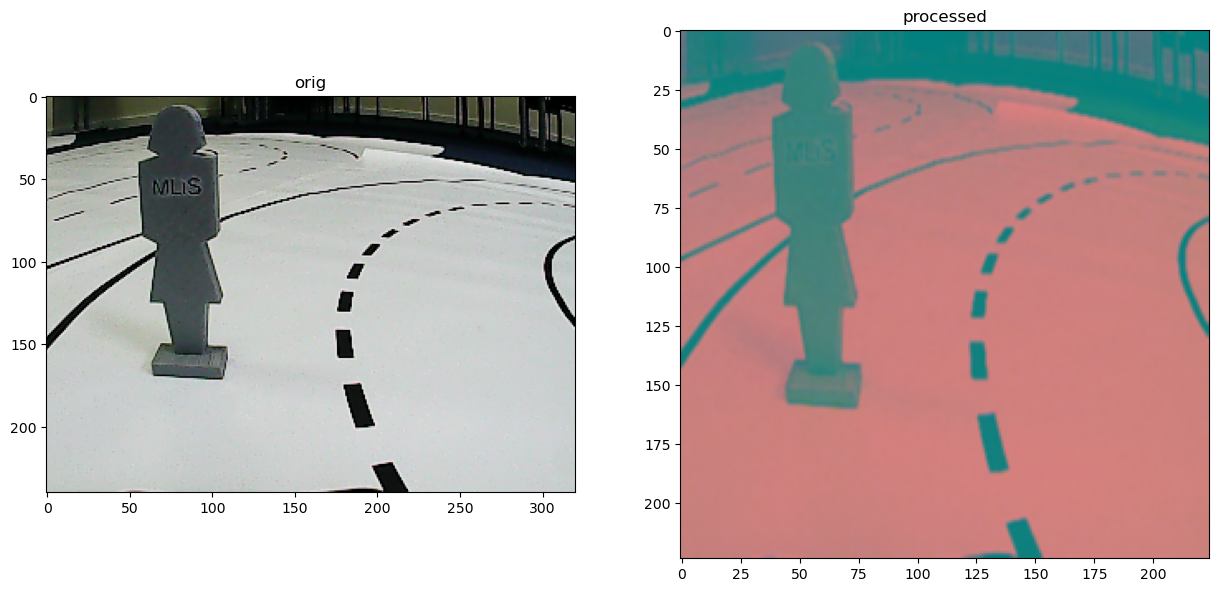

In [51]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def img_preprocess(image):
    # height, _, _ = image.shape
    # image = image[int(height/2):,:,:]  # remove top half of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (224,224)) # input image size (200,66) Nvidia model
    # image = image / 255 # normalizing, the processed image becomes black for some reason.  do we need this?
    # image = (image - 127.5) / 127.5
    return image


fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(merged_df['image_path'][image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [22]:
from tensorflow.keras.utils import to_categorical

def image_data_generator(image_paths, labels_dict, batch_size):
    while True:
        batch_images = []
        batch_angles = []
        batch_speeds = []
        
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image = my_imread(image_paths[random_index])

            # Since labels_dict is a dictionary, access the labels with keys
            angle_label = labels_dict['angle_output'][random_index]
            speed_label = labels_dict['speed_output'][random_index]
            angle_label *= 16
              
            image = img_preprocess(image)
            batch_images.append(image)
            
            # Assuming angle_label needs conversion to class index and one-hot encoding
            # Adjust this part according to how your angle labels are structured
            # Example assumes angle_label is already an integer class label; adjust if it's not
            angle_one_hot = to_categorical(angle_label, num_classes=17)  # Adjust num_classes based on your total classes
            batch_angles.append(angle_one_hot)
            
            # Add speed label as is (assuming it's already 0 or 1 for binary classification)
            batch_speeds.append(speed_label)
            
        batch_angles = np.array(batch_angles)
        batch_angles = batch_angles.reshape((batch_size, 17))
        yield (np.asarray(batch_images), {'angle_output': batch_angles, 'speed_output': np.array(batch_speeds)})


(2, 17)
(2, 17)


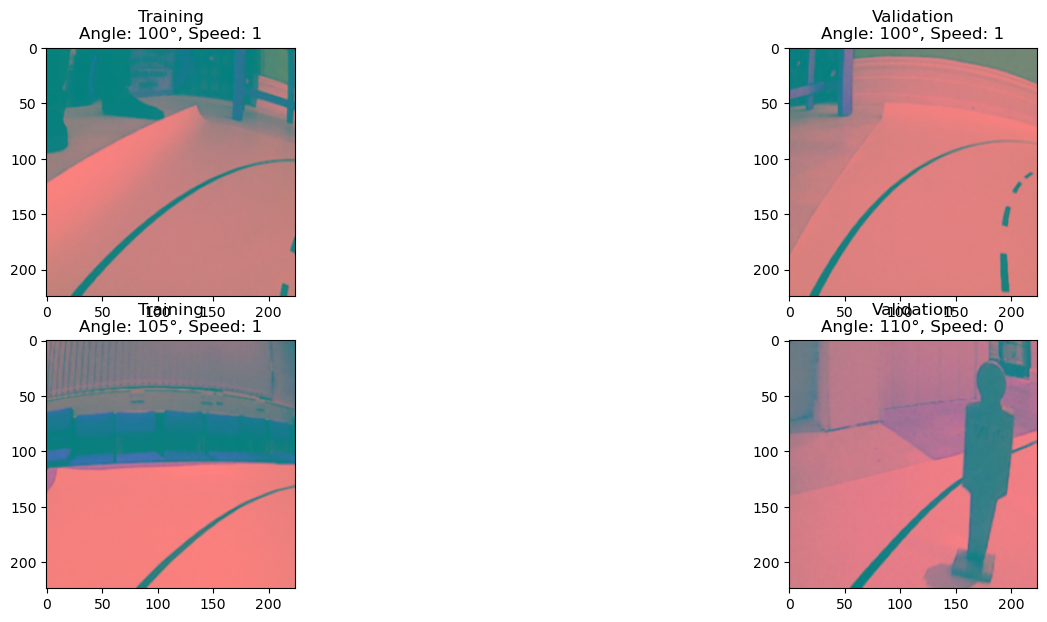

In [16]:
ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, {'angle_output': angle_train, 'speed_output': speed_train}, nrow)) 
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, {'angle_output': angle_valid, 'speed_output': speed_valid}, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6))
fig.tight_layout()

# Iterate through each row and column, plotting the images and titles
for i in range(nrow):
    # Training images
    axes[i][0].imshow(X_train_batch[i])
    # Since angle labels are one-hot encoded, use argmax to find the predicted class, and convert it back to the angle
    # Convert the one-hot encoded angle back to its original value (e.g., class 4 -> 4*5+50 = 70 degrees)
    angle_class = np.argmax(y_train_batch['angle_output'][i]) * 5 + 50
    speed = y_train_batch['speed_output'][i]
    # Adjust the title to include both angle and speed
    axes[i][0].set_title(f"Training\nAngle: {angle_class}°, Speed: {int(speed)}")
    
    # Validation images
    axes[i][1].imshow(X_valid_batch[i])
    # Repeat the process for validation batch
    angle_class = np.argmax(y_valid_batch['angle_output'][i]) * 5 + 50
    speed = y_valid_batch['speed_output'][i]
    axes[i][1].set_title(f"Validation\nAngle: {angle_class}°, Speed: {int(speed)}")

plt.show()


In [64]:

def mobile_net_classification_model():
    inputs = Input(shape=(224, 224, 3))
    x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)

    base_model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_tensor=x)
    base_model.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)

    # Common part of the model
    common = Dense(1024, activation='relu')(x)
    common = Dropout(0.5)(common)

    # Branch for the angle prediction (multi-class classification)
    angle_branch = Dense(512, activation='relu')(common)
    angle_branch = Dropout(0.5)(angle_branch)
    angle_output = Dense(17, activation='softmax', name='angle_output')(angle_branch) # 10 classes for angle

    # Branch for the speed prediction (binary classification)
    # speed_branch = Dense(512, activation='relu')(common)
    # speed_branch = Dropout(0.5)(speed_branch)
    speed_output = Dense(1, activation='sigmoid', name='speed_output')(common) # Binary classification for speed


    model = Model(inputs=inputs, outputs=[angle_output, speed_output])

    # Create an RMSprop optimizer with a custom learning rate
    custom_lr = 0.0001  # Example custom learning rate
    optimizer = RMSprop(learning_rate=custom_lr)

    model.compile(optimizer=optimizer,
                  loss={'angle_output': 'categorical_crossentropy', 'speed_output': 'binary_crossentropy'},
                  metrics={'angle_output': 'accuracy', 'speed_output': 'accuracy'})

    return model

# model = nvidia_model()
model = mobile_net_classification_model()
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_13 (Rescaling)    (None, 224, 224, 3)          0         ['input_14[0][0]']            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['rescaling_13[0][0]']        
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                       

In [19]:
model_output_dir = 'models/combined'

# start Tensorboard before model fit, so we can see the epoch tick in Tensorboard
# Jupyter Notebook embedded Tensorboard is a new feature in TF 2.0!!  

# clean up log folder for tensorboard
log_dir_root = f'{model_output_dir}/logs'
#!rm -rf $log_dir_root

tensorboard_callback = TensorBoard(log_dir_root, histogram_freq=1)

# Specify the file path where you want to save the model
filepath = 'models/combined/{epoch:02d}-{val_loss:.2f}'

# Create the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath,
    monitor='val_loss',     # Monitor validation loss
    verbose=1,              # Log a message each time the callback saves the model
    save_best_only=True,    # Only save the model if 'val_loss' has improved
    save_weights_only=False, # Only save the weights of the model
    mode='min',             # 'min' means the monitored quantity should decrease
    save_freq='epoch'       # Check every epoch
)

In [58]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir models/speed/logs20240316-005558 (started 0:00:36 ago; pid 25019)


In [61]:
'''
Connect to the below link.
http://localhost:port
'''

'\nConnect to the below link.\nhttp://localhost:port\n'

In [65]:
history = model.fit(
    image_data_generator(X_train, {'angle_output': angle_train, 'speed_output': speed_train}, batch_size=256),
    steps_per_epoch=500,
    epochs=10,
    validation_data = image_data_generator(X_valid, {'angle_output': angle_valid, 'speed_output': speed_valid}, batch_size=256),
    validation_steps=256,
    verbose=1,
    shuffle=1,
    callbacks=[model_checkpoint_callback, tensorboard_callback]
)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 1.7767 - angle_output_loss: 1.6549 - speed_output_loss: 0.1217 - angle_output_accuracy: 0.3559 - speed_output_accuracy: 0.9575

KeyboardInterrupt: 